# RAG Retrieval-Augmented Generation

QA system baseed on local documents----RAG


## RAG
1. Retrieval:ChromaDB Faiss
2. Context Encoding
3. Generation

### 1. Document loaders::TextLoader   / CSVLoader  /HTMLLoader   /JSONLoader  /mARKDOENlOADER  /PDFLoader....


### 2. Text Transformation

Text Splitting
1. Divide the text into small,semantically meaningful blocks.-usually sentences
2. Start combining these small blocks into larger blocks until a certain size is reached.
3. A block is formed ,and the creation od a new text block can begin.


How to splitting ?
Size of blocks
Length of overlapping text between blocks:

CharacterTextSplitter::"\n\n"
RecursiveCharacterTextSplitter::::["\n\n"."\n"," ",""]
MarkdownHeaderTextSplitter::# "##"
TokenSplitter


Text Transformation

Novels filter redundant documents. EmbeddingsRedundantFilter
Translated documents.tool doctran
Extract metadata.->doctran tool
Convert session format.->doctran tool


### 3.Text embedding models->LLM  



In [ ]:
from langchain.document_loaders import TextLoader
from langchain.document_loaders.csv_loader import CSVLoader

from langchain.text_splitter import CharacterTextSplitter,RecursiveCharacterTextSplitter,MarkdownHeaderTextSplitter,TokenTextSplitter,SpacyTextSplitter,SentenceTransformersTokenTextSplitter

In [1]:
from dotenv import load_dotenv
load_dotenv()

from langchain_openai import OpenAIEmbeddings
embeddings_model = OpenAIEmbeddings()
"""
embed_documents
embed_query
"""

embeddings = embeddings_model.embed_documents(
    [
        "Hello,is there anything I can help you with?",
        "Oh,hello! When will the flowers i ordered yesterday be delivered?",
        "Could you please provide some order numbers?",
        "12345678",
    ]
)

print(len(embeddings),len(embeddings[0]))

4 1536



4 1536


In [2]:
embeded_query = embeddings_model.embed_query("What was order number in the previous conversations?")
embeded_query[:3]

[-7.085396638374043e-05, -0.0002561684811420098, 0.011424169862919435]

In [3]:
### Embedding storage 4. Vector stores  or  Cache stores

#Cache stores:CacheBackerEmbeddings
"""
from_bytes_store:
underlying_embeddings
deocument_embedding_cache
namespace
"""

"""
different Cache strategies:
1. InMemoryStore
2. LocalFileStore
3. RedisStore ...
"""

from langchain.storage import InMemoryStore
from langchain.embeddings import CacheBackedEmbeddings
store = InMemoryStore()
underlying_embeddings = OpenAIEmbeddings()

embedder = CacheBackedEmbeddings.from_bytes_store(
    underlying_embeddings,store,namespace=underlying_embeddings.model
)

embeddings = embedder.embed_documents(["Hello","Interlligent flower customer service"])


In [4]:
print(embeddings)

[[-0.0218510545625826, -0.007065260536618144, -0.0286243622460395, -0.024381312623313372, -0.023524916842315693, 0.02914338829878499, -0.012482609164817929, -0.002765442846826589, -0.008200633053797158, -0.0050767369661783345, 0.02929909797725372, -0.003261762790332956, -0.015700578142420284, -0.002591893219401522, 0.012197143904485369, -0.0010331889720064519, 0.03861563890709876, 0.005809862895495783, 0.01897045158794227, -0.0136504205774629, -0.019800895134980134, 0.010043180197656347, 0.005183786438803044, 0.008940247507265832, -0.008129266738714018, -0.005323274806893712, 0.002593515117608693, -0.012138753706382137, 0.0033542147134318578, -0.015765457795997282, 0.0038213393250559734, -0.01619365568649612, -0.01784156759491448, -0.012930269833802818, 0.004087340875579942, -0.016310436082702585, -0.000862883082788068, -0.009770691054303695, 0.02147475927735831, -0.00847312219714981, 0.013001636148885958, -0.006507306132932933, 0.0034937033143531606, -0.006831698347221404, -0.02789772

In [ ]:
#Vector stores  LangChain
"""Chroma Qdrant Faiss Elasticsearch

Activeloop Deep Lake
Alibaba cloud openSearch
AnalyticDB
Annoy
Atlas
AwaDB
Azure Cognitive Search
BagelDB
Chroma
Dingo
Faiss
LanceDB
Google Vertex Ai MrtchingEngine.....Redis,Qdrant,SCIKIT-LEARN,Zep,zilliz.....
"""

"""
data scale and speed
Cost
Performance Benchmark

"""

In [8]:
### 5. Data Retrievers

from langchain_community.document_loaders import TextLoader
from langchain.indexes import VectorstoreIndexCreator

loader = TextLoader("The_Complete_Guide_to_Flower_Language.txt")
index = VectorstoreIndexCreator().from_loaders([loader])

query = "What is the meaning of rose flowers?"
result = index.query(query)
print(result)

Number of requested results 4 is greater than number of elements in index 2, updating n_results = 2


 Love, Passion, Beauty


In [ ]:
from langchain_text_splitters import CharacterTextSplitter
from langchain_community.vectorstores import Chroma,Qdrant
from langchain_openai import OpenAIEmbeddings

# text_splitter = CharacterTextSplitter(chunk_size=1000,chunk_overlap=0)
embeddings = OpenAIEmbeddings()

index_creator = VectorstoreIndexCreator(
    vectorstore_cls=Qdrant,
    embedding=OpenAIEmbeddings(),
    text_splitter=CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
)

index = index_creator.from_loaders([loader])

query = "What is the meaning of rose flowers?"
result = index.query(query)  
#QARetrival
print(result)

In [ ]:
## Various types of Retrival
"""
MultiQueryRetriever
ContextualCompressionRetriev
EmsembleRetriever:BM25...
MultiVectorRetriever
ParentDoumentRetriever
selfQueryRetriever
WebResearchRetriever
TimeWeightedVectorStoreRetriever

"""

In [ ]:
# 6. Indexing
"""
Avoid duplicate content
Update only the changed content
Save momey and time
Optimize search results
"""

"""
RecordManager:
document hash
write time
source id

"""



LlamaIndex    
Assistants

## Indexing   Retrieval and generation

# Build an app that answers questions about the website's content.   ->Indexing pipline and RAG

In [ ]:
import bs4
from langchain_community.document_loaders import WebBaseLoader

# Only keep post title, headers, and content from the full HTML.
bs4_strainer = bs4.SoupStrainer(class_=("post-title", "post-header", "post-content"))
loader = WebBaseLoader(
    web_paths=("https://lilianweng.github.io/posts/2023-06-23-agent/",),
    bs_kwargs={"parse_only": bs4_strainer},
)
docs = loader.load()

assert len(docs) == 1
print(f"Total characters: {len(docs[0].page_content)}")

Total characters: 43131

In [ ]:
print(docs[0].page_content[:50])

      LLM Powered Autonomous Agents
    
Date: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng


Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.
Agent System Overview#
In

In [ ]:
#Splitting documents 
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,  # chunk size (characters)
    chunk_overlap=200,  # chunk overlap (characters)
    add_start_index=True,  # track index in original document
)
all_splits = text_splitter.split_documents(docs)

print(f"Split blog post into {len(all_splits)} sub-documents.")

Split blog post into 66 sub-documents.

In [ ]:
#Semantic search
document_ids = vector_store.add_documents(documents=all_splits)

print(document_ids[:3])

['07c18af6-ad58-479a-bfb1-d508033f9c64', '9000bf8e-1993-446f-8d4d-f4e507ba4b8f', 'ba3b5d14-bed9-4f5f-88be-44c88aedc2e6']

In [ ]:
#Retrieval and Generation
from langchain import hub

prompt = hub.pull("rlm/rag-prompt")

example_messages = prompt.invoke(
    {"context": "(context goes here)", "question": "(question goes here)"}
).to_messages()

assert len(example_messages) == 1
print(example_messages[0].content)

You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: (question goes here) 
Context: (context goes here) 
Answer:

In [ ]:
# To use LangGraph:three things:
1. The State of application
2. The nodes
3. control flow

In [1]:
#State
from langchain_core.documents import Document
from typing_extensions import List, TypedDict


class State(TypedDict):
    question: str
    context: List[Document]
    answer: str

In [2]:
#nodes
def retrieve(state: State):
    retrieved_docs = vector_store.similarity_search(state["question"])
    return {"context": retrieved_docs}


def generate(state: State):
    docs_content = "\n\n".join(doc.page_content for doc in state["context"])
    messages = prompt.invoke({"question": state["question"], "context": docs_content})
    response = llm.invoke(messages)
    return {"answer": response.content}

In [ ]:
#control flow
from langgraph.graph import START, StateGraph

graph_builder = StateGraph(State).add_sequence([retrieve, generate])
graph_builder.add_edge(START, "retrieve")
graph = graph_builder.compile()

In [ ]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

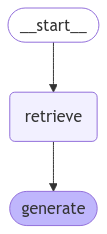

In [ ]:
#LangGraph:Sync  async streaming
result = graph.invoke({"question": "What is Task Decomposition?"})

print(f'Context: {result["context"]}\n\n')
print(f'Answer: {result["answer"]}')

Context: [Document(id='a42dc78b-8f76-472a-9e25-180508af74f3', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'start_index': 1585}, page_content='Fig. 1. Overview of a LLM-powered autonomous agent system.\nComponent One: Planning#\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.\nTask Decomposition#\nChain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks. The model is instructed to “think step by step” to utilize more test-time computation to decompose hard tasks into smaller and simpler steps. CoT transforms big tasks into multiple manageable tasks and shed lights into an interpretation of the model’s thinking process.'),

Document(id='c0e45887-d0b0-483d-821a-bb5d8316d51d', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'start_index': 2192}, page_content='Tree of Thoughts (Yao et al. 2023) extends CoT by exploring multiple reasoning possibilities at each step. It first decomposes the problem into multiple thought steps and generates multiple thoughts per step, creating a tree structure. The search process can be BFS (breadth-first search) or DFS (depth-first search) with each state evaluated by a classifier (via a prompt) or majority vote.\nTask decomposition can be done (1) by LLM with simple prompting like "Steps for XYZ.\\n1.", "What are the subgoals for achieving XYZ?", (2) by using task-specific instructions; e.g. "Write a story outline." for writing a novel, or (3) with human inputs.'), 
Document(id='4cc7f318-35f5-440f-a4a4-145b5f0b918d', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'start_index': 29630}, page_content='Resources:\n1. Internet access for searches and information gathering.\n2. Long Term memory management.\n3. GPT-3.5 powered Agents for delegation of simple tasks.\n4. File output.\n\nPerformance Evaluation:\n1. Continuously review and analyze your actions to ensure you are performing to the best of your abilities.\n2. Constructively self-criticize your big-picture behavior constantly.\n3. Reflect on past decisions and strategies to refine your approach.\n4. Every command has a cost, so be smart and efficient. Aim to complete tasks in the least number of steps.'), 
Document(id='f621ade4-9b0d-471f-a522-44eb5feeba0c', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'start_index': 19373}, page_content="(3) Task execution: Expert models execute on the specific tasks and log results.\nInstruction:\n\nWith the input and the inference results, the AI assistant needs to describe the process and results. The previous stages can be formed as - User Input: {{ User Input }}, Task Planning: {{ Tasks }}, Model Selection: {{ Model Assignment }}, Task Execution: {{ Predictions }}. You must first answer the user's request in a straightforward manner. Then describe the task process and show your analysis and model inference results to the user in the first person. If inference results contain a file path, must tell the user the complete file path.")]


Answer: Task decomposition is a technique used to break down complex tasks into smaller, manageable steps, allowing for more efficient problem-solving. This can be achieved through methods like chain of thought prompting or the tree of thoughts approach, which explores multiple reasoning possibilities at each step. It can be initiated through simple prompts, task-specific instructions, or human inputs.

In [ ]:
#stream()
for step in graph.stream(
    {"question": "What is Task Decomposition?"}, stream_mode="updates"
):
    print(f"{step}\n\n----------------\n")

{'retrieve': {'context': [Document(id='a42dc78b-8f76-472a-9e25-180508af74f3', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'start_index': 1585}, page_content='Fig. 1. Overview of a LLM-powered autonomous agent system.\nComponent One: Planning#\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.\nTask Decomposition#\nChain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks. The model is instructed to “think step by step” to utilize more test-time computation to decompose hard tasks into smaller and simpler steps. CoT transforms big tasks into multiple manageable tasks and shed lights into an interpretation of the model’s thinking process.'), Document(id='c0e45887-d0b0-483d-821a-bb5d8316d51d', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'start_index': 2192}, page_content='Tree of Thoughts (Yao et al. 2023) extends CoT by exploring multiple reasoning possibilities at each step. It first decomposes the problem into multiple thought steps and generates multiple thoughts per step, creating a tree structure. The search process can be BFS (breadth-first search) or DFS (depth-first search) with each state evaluated by a classifier (via a prompt) or majority vote.\nTask decomposition can be done (1) by LLM with simple prompting like "Steps for XYZ.\\n1.", "What are the subgoals for achieving XYZ?", (2) by using task-specific instructions; e.g. "Write a story outline." for writing a novel, or (3) with human inputs.'), Document(id='4cc7f318-35f5-440f-a4a4-145b5f0b918d', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'start_index': 29630}, page_content='Resources:\n1. Internet access for searches and information gathering.\n2. Long Term memory management.\n3. GPT-3.5 powered Agents for delegation of simple tasks.\n4. File output.\n\nPerformance Evaluation:\n1. Continuously review and analyze your actions to ensure you are performing to the best of your abilities.\n2. Constructively self-criticize your big-picture behavior constantly.\n3. Reflect on past decisions and strategies to refine your approach.\n4. Every command has a cost, so be smart and efficient. Aim to complete tasks in the least number of steps.'), Document(id='f621ade4-9b0d-471f-a522-44eb5feeba0c', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'start_index': 19373}, page_content="(3) Task execution: Expert models execute on the specific tasks and log results.\nInstruction:\n\nWith the input and the inference results, the AI assistant needs to describe the process and results. The previous stages can be formed as - User Input: {{ User Input }}, Task Planning: {{ Tasks }}, Model Selection: {{ Model Assignment }}, Task Execution: {{ Predictions }}. You must first answer the user's request in a straightforward manner. Then describe the task process and show your analysis and model inference results to the user in the first person. If inference results contain a file path, must tell the user the complete file path.")]}}

----------------

{'generate': {'answer': 'Task decomposition is the process of breaking down a complex task into smaller, more manageable steps. This technique, often enhanced by methods like Chain of Thought (CoT) or Tree of Thoughts, allows models to reason through tasks systematically and improves performance by clarifying the thought process. It can be achieved through simple prompts, task-specific instructions, or human inputs.'}}

----------------

In [ ]:
#sream tokens

for message, metadata in graph.stream(
    {"question": "What is Task Decomposition?"}, stream_mode="messages"
):
    print(message.content, end="|")

|Task| decomposition| is| the| process| of| breaking| down| complex| tasks| into| smaller|,| more| manageable| steps|.| It| can| be| achieved| through| techniques| like| Chain| of| Thought| (|Co|T|)| prompting|,| which| encourages| the| model| to| think| step| by| step|,| or| through| more| structured| methods| like| the| Tree| of| Thoughts|.| This| approach| not| only| simplifies| task| execution| but| also| provides| insights| into| the| model|'s| reasoning| process|.||

In [ ]:
#Customizing the prompt
from langchain_core.prompts import PromptTemplate

template = """Use the following pieces of context to answer the question at the end.
If you don't know the answer, just say that you don't know, don't try to make up an answer.
Use three sentences maximum and keep the answer as concise as possible.
Always say "thanks for asking!" at the end of the answer.

{context}

Question: {question}

Helpful Answer:"""
custom_rag_prompt = PromptTemplate.from_template(template)

# Query analysis 

In [ ]:
total_documents = len(all_splits)
third = total_documents // 3

for i, document in enumerate(all_splits):
    if i < third:
        document.metadata["section"] = "beginning"
    elif i < 2 * third:
        document.metadata["section"] = "middle"
    else:
        document.metadata["section"] = "end"


all_splits[0].metadata

{'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/',
 'start_index': 8,
 'section': 'beginning'}

In [ ]:
from langchain_core.vectorstores import InMemoryVectorStore

vector_store = InMemoryVectorStore(embeddings)
_ = vector_store.add_documents(all_splits)

In [ ]:
from typing import Literal

from typing_extensions import Annotated


class Search(TypedDict):
    """Search query."""

    query: Annotated[str, ..., "Search query to run."]
    section: Annotated[
        Literal["beginning", "middle", "end"],
        ...,
        "Section to query.",
    ]

In [ ]:
#workflow
class State(TypedDict):
    question: str
    query: Search
    context: List[Document]
    answer: str


def analyze_query(state: State):
    structured_llm = llm.with_structured_output(Search)
    query = structured_llm.invoke(state["question"])
    return {"query": query}


def retrieve(state: State):
    query = state["query"]
    retrieved_docs = vector_store.similarity_search(
        query["query"],
        filter=lambda doc: doc.metadata.get("section") == query["section"],
    )
    return {"context": retrieved_docs}


def generate(state: State):
    docs_content = "\n\n".join(doc.page_content for doc in state["context"])
    messages = prompt.invoke({"question": state["question"], "context": docs_content})
    response = llm.invoke(messages)
    return {"answer": response.content}


graph_builder = StateGraph(State).add_sequence([analyze_query, retrieve, generate])
graph_builder.add_edge(START, "analyze_query")
graph = graph_builder.compile()

In [ ]:
display(Image(graph.get_graph().draw_mermaid_png()))

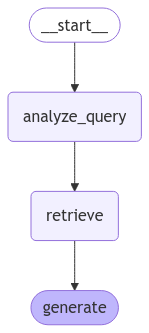

In [ ]:
for step in graph.stream(
    {"question": "What does the end of the post say about Task Decomposition?"},
    stream_mode="updates",
):
    print(f"{step}\n\n----------------\n")

{'analyze_query': {'query': {'query': 'Task Decomposition', 'section': 'end'}}}

----------------

{'retrieve': {'context': [Document(id='d6cef137-e1e8-4ddc-91dc-b62bd33c6020', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'start_index': 39221, 'section': 'end'}, page_content='Finite context length: The restricted context capacity limits the inclusion of historical information, detailed instructions, API call context, and responses. The design of the system has to work with this limited communication bandwidth, while mechanisms like self-reflection to learn from past mistakes would benefit a lot from long or infinite context windows. Although vector stores and retrieval can provide access to a larger knowledge pool, their representation power is not as powerful as full attention.\n\n\nChallenges in long-term planning and task decomposition: Planning over a lengthy history and effectively exploring the solution space remain challenging. LLMs struggle to adjust plans when faced with unexpected errors, making them less robust compared to humans who learn from trial and error.'), Document(id='d1834ae1-eb6a-43d7-a023-08dfa5028799', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'start_index': 39086, 'section': 'end'}, page_content='}\n]\nChallenges#\nAfter going through key ideas and demos of building LLM-centered agents, I start to see a couple common limitations:'), Document(id='ca7f06e4-2c2e-4788-9a81-2418d82213d9', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'start_index': 32942, 'section': 'end'}, page_content='}\n]\nThen after these clarification, the agent moved into the code writing mode with a different system message.\nSystem message:'), Document(id='1fcc2736-30f4-4ef6-90f2-c64af92118cb', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'start_index': 35127, 'section': 'end'}, page_content='"content": "You will get instructions for code to write.\\nYou will write a very long answer. Make sure that every detail of the architecture is, in the end, implemented as code.\\nMake sure that every detail of the architecture is, in the end, implemented as code.\\n\\nThink step by step and reason yourself to the right decisions to make sure we get it right.\\nYou will first lay out the names of the core classes, functions, methods that will be necessary, as well as a quick comment on their purpose.\\n\\nThen you will output the content of each file including ALL code.\\nEach file must strictly follow a markdown code block format, where the following tokens must be replaced such that\\nFILENAME is the lowercase file name including the file extension,\\nLANG is the markup code block language for the code\'s language, and CODE is the code:\\n\\nFILENAME\\n\`\`\`LANG\\nCODE\\n\`\`\`\\n\\nYou will start with the \\"entrypoint\\" file, then go to the ones that are imported by that file, and so on.\\nPlease')]}}

----------------

{'generate': {'answer': 'The end of the post highlights that task decomposition faces challenges in long-term planning and adapting to unexpected errors. LLMs struggle with adjusting their plans, making them less robust compared to humans who learn from trial and error. This indicates a limitation in effectively exploring the solution space and handling complex tasks.'}}

----------------

In [ ]:
# What is Agentic RAG  ：Agentic RAG describes and AI-agent-based implementation of RAG.
#
# ?  ->AI-agent RAG pipline:  Naive RAG
ReAct = Reason + Act


Single-Agent RAG(Route)
Muliti-Agent RAG

Agentic RAG vs RAG(vanilla)